4 peaks were detected
Peak 1 has a velocity of 150 degrees/s at time 162 ms
Peak 2 has a velocity of 165 degrees/s at time 488 ms
Peak 3 has a velocity of 160 degrees/s at time 844 ms
Peak 4 has a velocity of 145 degrees/s at time 1201 ms


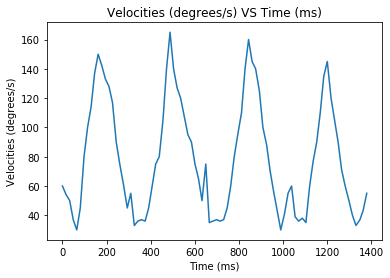

Results are below: Velocities are in degrees/s and Times are in ms.
The following table shows the onset and offset velocities and times for all 4 peaks detected.
It also shows the saccade durations.


,Onset Velocity,Onset Time,Offset Velocity,Offset Time,Saccade Duration
1,30,65,45,294,229
2,36,375,50,633,258
3,36,715,30,990,275
4,35,1104,33,1331,227


In [85]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

"""
Created on Thu Jul 23 18:50:45 2020

23/07/2020: Jad peaks + onsets
24/07/2020: refined + comments + graphs
25/07/2020: offsets + saccade detection (onsets,offsets, and duration)

@author: Jad Atweh
"""
#Open in Jupyter

"""
Those values are placed just to come up with the logic and proceed.
We import them from the excel files after calculating the velocites 
"""



"""
I tried to imitate the actual graph (I focused on saccades and glissade peaks for now not on fixations). 
That's why fixations are short as not my purpose now
"""

time = [0,17,33,49,65,81,98,114,130,146,162,179,195,211,227,244,260,278,294,310,326,342,358,375,391,407,423,439,456,472,488,504,520,536,569,585,601,617,633,650,666,682,699,715,731,747,763,779,796,812,828,844,860,876,893,909,926,942,959,974,990,1007,1023,1039,1055,1071,1088,1104,1121,1137,1153,1169,1185,1201,1218,1234,1250,1266,1282,1299,1315,1331,1349,1363,1380]
velocities = [60,54,50,37,30,45,80,100,114,137,150,142,133,128,117,90,75,60,45,55,33,36,37,36,45,60,75,80,105,140,165,140,127,120,95,90,75,65,50,75,35,36,37,36,37,45,60,80,96,110,140,160,145,140,125,100,88,70,55,43,30,41,55,60,39,36,38,35,60,77,90,110,135,145,120,105,90,71,60,50,40,33,37,43,55]

#I chose any numbers until we determine the velocity threshold, onset and offset thresholds
#arbitrary values, PT will be determined before (each participant has a different PT for a different load)
PT=100
onset_threshold = 40
offset_threshold = 60

#those will be changed at the end to add in the excel file or in a text file
onsets_times = []
onsets_velocities = []
offsets_times = []
offsets_velocities = [] 
offsets=[]
peak_times = []
peaks = [] 

indices = find_peaks(velocities, height = PT)[0]


#I drew this plot to visually see the peaks and follow each point. The velocities VS time plot is below
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=velocities,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices,
    y=[velocities[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))
#this shows a graph of velocites as a function of indices of the velocities as the the function 
#returns the index of the velocity in the list not the time
#I added below a new list for the peak times

print (len(indices),'peaks were detected')
for i in range(len(indices)): 
    r=indices[i]
    peak_times.append(time[r])
    peaks.append(i+1)
    #we need to add ouput.write at the end as we create a seperate column/text file
    print('Peak',i+1,'has a velocity of',velocities[r],'degrees/s at time',time[r],'ms')
    

    
fig.show()

#velocities VS time plot
plt.title('Velocities (degrees/s) VS Time (ms)')
plt.xlabel('Time (ms)')
plt.ylabel('Velocities (degrees/s)')
plt.plot(time,velocities)
plt.show()


left_most=0
vel=[]

for each in range(len(indices)):
    i=indices[each]
    for v in range(i,left_most,-1):
        if velocities[v]<onset_threshold and velocities[v]-velocities[v-1]<0 and velocities[v]-velocities[v+1]<0:
                onsets_velocities.append(velocities[v])
                onsets_times.append(time[v])
                #when we write in excel or text, we say peak #1 had onset velcoties[j]
                break
    left_most=i


    
#######################################################

for each in range(len(indices)):
    i=indices[each]
    if each==len(indices)-1:
        for index in range(len(velocities)):
            if index==len(velocities)-1:
                right_most=index
    else:
        right_most=indices[each+1]
        
    for v in range(i,right_most,1):
        if velocities[v]<offset_threshold and velocities[v]-velocities[v-1]<0 and velocities[v]-velocities[v+1]<0:
            offsets_velocities.append(velocities[v])
            offsets_times.append(time[v])
            #when we write in excel or text, we say peak #1 had offset velcoties[v]
            break
saccade_duration=[]

for each in range(len(indices)):
    s=offsets_times[each]-onsets_times[each]
    saccade_duration.append(s)
    

#################################################################################

columns=['Onset Velocity','Onset Time', 'Offset Velocity', 'Offset Time','Saccade Duration']
detailedsolution = pd.DataFrame(columns=columns, index=peaks)
print('Results are below: Velocities are in degrees/s and Times are in ms.')
print('The following table shows the onset and offset velocities and times for all',len(indices),'peaks detected.')
print('It also shows the saccade durations.')
for t in range(1,len(indices)+1):
    detailedsolution.loc[t,'Onset Velocity']=onsets_velocities[t-1]
    detailedsolution.loc[t,'Onset Time']=onsets_times[t-1]
    detailedsolution.loc[t,'Offset Velocity']=offsets_velocities[t-1]
    detailedsolution.loc[t,'Offset Time']=offsets_times[t-1]
    detailedsolution.loc[t,'Saccade Duration']=saccade_duration[t-1]
detailedsolution

    
